In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import models
from torchvision.io import read_image
from torch import nn, optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# Faster RCNN 사용

In [3]:
dir(models.detection)

['FCOS',
 'FCOS_ResNet50_FPN_Weights',
 'FasterRCNN',
 'FasterRCNN_MobileNet_V3_Large_320_FPN_Weights',
 'FasterRCNN_MobileNet_V3_Large_FPN_Weights',
 'FasterRCNN_ResNet50_FPN_V2_Weights',
 'FasterRCNN_ResNet50_FPN_Weights',
 'KeypointRCNN',
 'KeypointRCNN_ResNet50_FPN_Weights',
 'MaskRCNN',
 'MaskRCNN_ResNet50_FPN_V2_Weights',
 'MaskRCNN_ResNet50_FPN_Weights',
 'RetinaNet',
 'RetinaNet_ResNet50_FPN_V2_Weights',
 'RetinaNet_ResNet50_FPN_Weights',
 'SSD300_VGG16_Weights',
 'SSDLite320_MobileNet_V3_Large_Weights',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'anchor_utils',
 'backbone_utils',
 'faster_rcnn',
 'fasterrcnn_mobilenet_v3_large_320_fpn',
 'fasterrcnn_mobilenet_v3_large_fpn',
 'fasterrcnn_resnet50_fpn',
 'fasterrcnn_resnet50_fpn_v2',
 'fcos',
 'fcos_resnet50_fpn',
 'generalized_rcnn',
 'image_list',
 'keypoint_rcnn',
 'keypointrcnn_resnet50_fpn',
 'mask_rcnn',
 'maskrcnn_resnet50_fpn'

In [80]:
## 모델 불러 오기

weights = models.detection.FasterRCNN_ResNet50_FPN_Weights.COCO_V1
fasterRCNN = models.detection.fasterrcnn_resnet50_fpn(weights=weights)
# fasterRCNN

# coco_labels_list
coco_labels_list = weights.meta["categories"]
print("labels len = ", len(coco_labels_list))
coco_labels_list

labels len =  91


['__background__',
 'person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'N/A',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'N/A',
 'backpack',
 'umbrella',
 'N/A',
 'N/A',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'N/A',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'N/A',
 'dining table',
 'N/A',
 'N/A',
 'toilet',
 'N/A',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'N/A',
 'book',
 'clock',
 'vase',
 'scissors',
 'ted

In [16]:
fasterRCNN = fasterRCNN.to(device)

fasterRCNN.eval() #

x = torch.rand(2, 3, 300, 400).to(device)
# x.shape
predictions = fasterRCNN(x)
predictions[0]

# plt.imshow(x[0].cpu().)

{'boxes': tensor([], device='cuda:0', size=(0, 4), grad_fn=<StackBackward0>),
 'labels': tensor([], device='cuda:0', dtype=torch.int64),
 'scores': tensor([], device='cuda:0', grad_fn=<IndexBackward0>)}

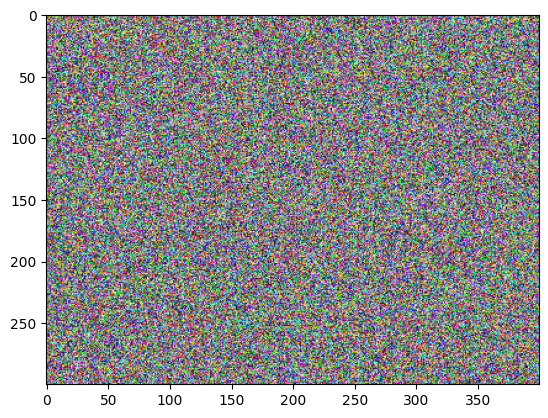

In [12]:
## [300, 400, 3]
plt.imshow(x[0].cpu().permute(1, 2, 0))
plt.show()

In [23]:
data_dir = "./figure"
img_path = os.path.join(data_dir, "dog.jpg")

img = read_image(img_path).to(device)
# img.shape

torch.Size([3, 576, 768])

In [28]:
fasterRCNN = fasterRCNN.to(device)
fasterRCNN.eval()

## preprocessing
preprocess = weights.transforms()
batch_img = preprocess(img).unsqueeze(0)
batch_img.shape

torch.Size([1, 3, 576, 768])

In [43]:
import time

start = time.time()
pred = fasterRCNN(batch_img)
stop = time.time()
print(f"estimation time = {(stop - start)*1000:.3f}ms")

estimation time = 44.617ms


In [54]:
display(pred[0]["boxes"])
display(pred[0]["labels"])
pred[0]["scores"]

pred_dict = pred[0]

tensor([[130.3119, 225.0442, 319.0385, 534.0598],
        [163.7573, 104.9810, 570.4273, 448.7618],
        [127.9437, 139.2880, 277.1607, 382.7638],
        [471.6625,  79.2765, 680.4767, 169.9655],
        [129.2781, 231.7257, 218.7481, 381.2823],
        [467.3203,  83.1578, 678.7388, 167.9613],
        [711.6573,  29.0644, 760.4045, 244.5150],
        [132.6440, 122.8441, 409.7048, 420.1129],
        [676.1843,  98.1248, 718.5806, 155.4029],
        [126.9544, 132.6598, 436.8940, 404.3223],
        [ 58.3778,  85.2101, 103.5172, 127.3276],
        [599.1306, 105.8076, 619.8306, 122.4438],
        [ 55.8856,  86.5450,  84.3312, 135.6514],
        [134.2084, 215.0716, 322.5768, 536.2996],
        [ 58.4245,  79.5712, 106.2031, 127.5271],
        [600.6810, 107.6767, 613.7615, 120.5347],
        [718.4589,  28.6712, 766.1318, 269.9480],
        [124.7120, 138.0833, 591.1965, 512.2134],
        [677.8397,  32.0316, 744.9026, 163.6185],
        [ 69.7196,  86.9620, 100.3570, 123.6975],


tensor([18,  2,  2,  3,  2,  8, 64,  2, 64, 15, 64,  1, 64, 17,  4,  1, 72, 15,
        64,  4, 15, 62,  1, 31, 62], device='cuda:0')

In [98]:
## Bounding box
threshold = 0.7
indices = pred_dict["scores"] > threshold

pred_boxes = pred_dict["boxes"][indices]
pred_labels = pred_dict["labels"][indices]
pred_scores = pred_dict["scores"][indices]
# pred_boxes
# pred_labels
# pred_scores
# len(pred_boxes)
int(pred_boxes[0][0])
pred_labels

tensor([18,  2,  2,  3], device='cuda:0')

In [104]:
import random

data_dir = "./figure"

img_path = os.listdir(data_dir)
img_path

img_lists = []

for i in img_path:
  img_lists.append(os.path.join(data_dir, i))

display(img_lists)

['./figure/kite.jpg',
 './figure/sheep.jpg',
 './figure/dog.jpg',
 './figure/person.jpg',
 './figure/peoples.jpg']

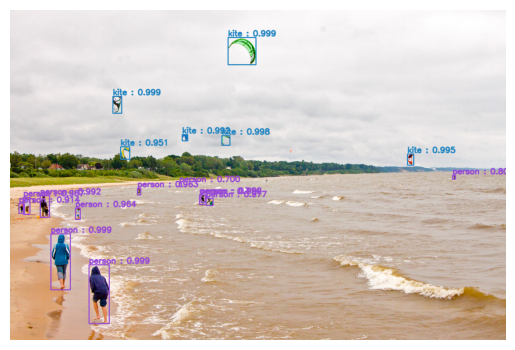

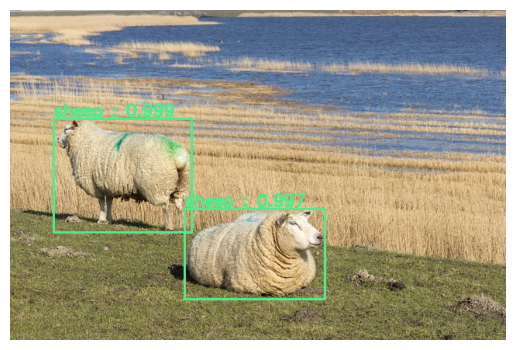

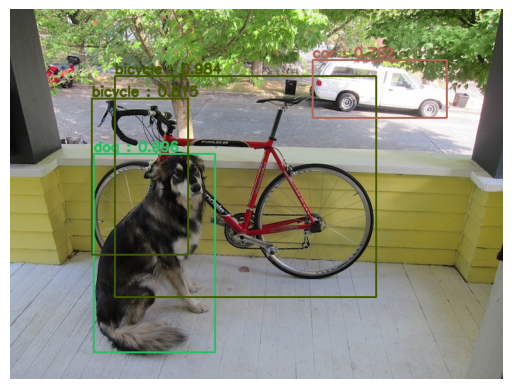

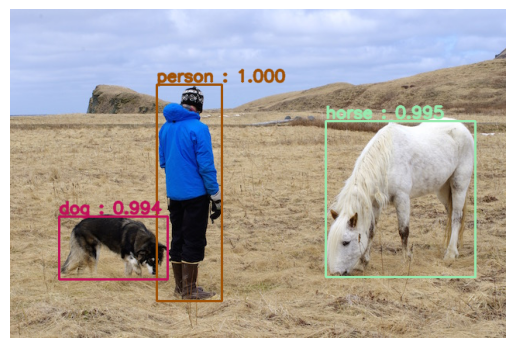

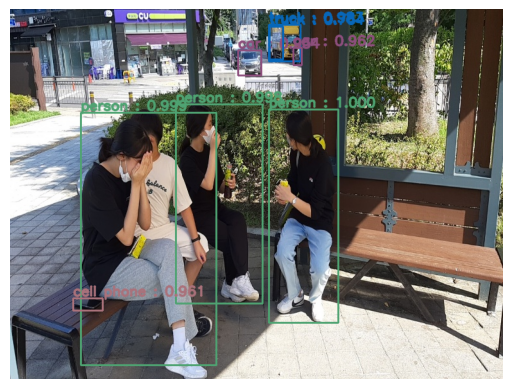

In [107]:
fasterRCNN.eval()
fasterRCNN = fasterRCNN.to(device)

for i in img_lists:

  img = read_image(i).to(device)
  batch_img = preprocess(img).unsqueeze(0)

  pred = fasterRCNN(batch_img)

  threshold = 0.7

  indices = pred[0]["scores"] > threshold

  pred_boxes = pred[0]["boxes"][indices]
  pred_labels = pred[0]["labels"][indices]
  pred_scores = pred[0]["scores"][indices]

  image = img.cpu().permute(1, 2, 0).numpy()
  color_array = [[random.randint(0, 255) for _ in range(3)] for _ in range(91)]

  for i in range(len(pred_boxes)):
    x_min = int(pred_boxes[i][0])
    y_min = int(pred_boxes[i][1])
    x_max = int(pred_boxes[i][2])
    y_max = int(pred_boxes[i][3])

    color =  color_array[pred_labels[i]]
    category = coco_labels_list[pred_labels[i]]

    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, 2)
    text = f"{category} : {pred_scores[i]:.3f}"
    cv2.putText(image, text, (x_min, y_min-4), 0,
                0.7, color, 2, cv2.LINE_AA)

  plt.imshow(image)
  plt.axis("off")
  plt.show()